In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})


In [7]:
df = pd.read_csv('../data/all_rates.csv')
df['id'] = pd.to_numeric(df['name'].str[9:])
df = df.drop(columns=['name'])
df = df.set_index('id')
df.head()
df = df.drop(columns=['retracted', 'formal', 'crit'])
df['bad'] = 100-df['I']-df['II']-df['qual']
df.head()

,I,II,qual,bad
id,,,,
1,43,19,25,13
2,52,14,15,19
3,42,24,26,8
4,49,22,23,6
5,50,20,23,7


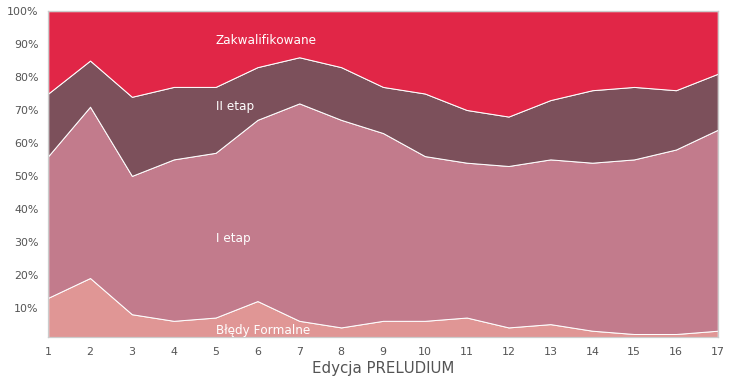

In [14]:
color_map = reversed(["#e12647", "#7c505b", "#c27b8c", "#e09695"])

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.stackplot(df.reset_index()['id'], df['bad'], df['I'], df['II'], df['qual'], colors = color_map)
ax.set_xlim(1, len(df))
ax.set_xticks(range(1, len(df)+1))
ax.text(5, 2, 'Błędy Formalne', fontsize=12, color='white')
ax.text(5, 30, 'I etap', fontsize=12, color='white')
ax.text(5, 70, 'II etap', fontsize=12, color='white')
ax.text(5, 90, 'Zakwalifikowane', fontsize=12, color='white')
ax.set_yticks(range(0, 101, 10))
ax.set_ylim(1, 100)

ax.xaxis.label.set_color('#545454')
ax.yaxis.label.set_color('#545454')
ax.tick_params(axis='x', colors='#545454')
ax.tick_params(axis='y', colors='#545454')

ax.set_yticklabels(['{}%'.format(x) for x in range(0, 110, 10)])
plt.xlabel('Edycja PRELUDIUM', fontsize=15)
plt.show()

In [ ]:
fig.savefig('all_rates.png', transparent=True)